## 빅데이터 구현 기술
---

- 빅데이터 아키텍처는 역활별로 수집, 적재, 처리 및 탐색, 분석 및 응용이라는 6개의 레이어로 나눌수 있다. 각 단계별 주요 기술은 그림과 같다.

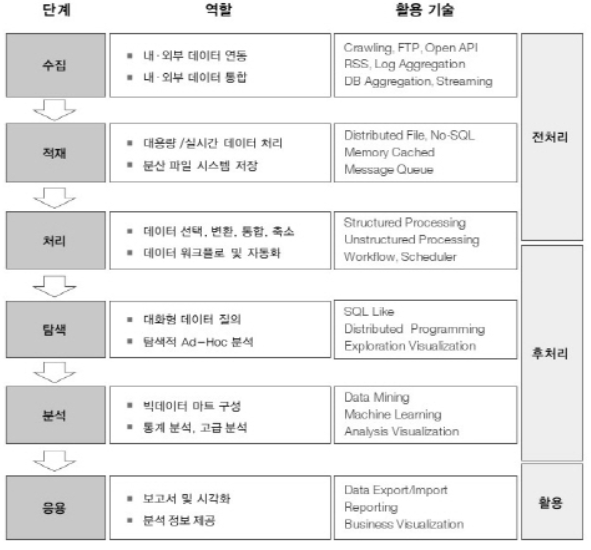

- 구현 기술 수행 순서
 - 수집 -> 적재 -> 처리 및 탐색 -> 분석 및 응용
   - 3번째(처리 및 탐색)와 4번째(분석 및 응용) 단계는 필요 시 반복 진행하면서 데이터의 품질과 분석 수준을 향상시킨다.

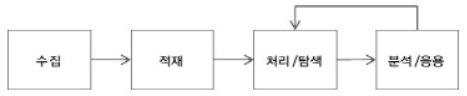

**수집 기술**

- 조직의 내외부에 있는 다양한 시스템으로부터 원천 데이터를 효과적으로 수집하는 기술
- 빅데이터 수집에는 기존의 수집 시스템에서 다뤘던 데이터 보다 더 크고 다양한 형식의 데이터를 빠르게 처리해야 하는 기능이 필요
 - 때문에 빅데이터 수집 아키텍처는 선형 확장이 가능하면서 분산 처리가 가능한 형태로 구성
- 빅데이터 수집기는 원천 시스템의 다양한 인터페이스 유형(데이터베이스, 파일, API 등)과 연결되어 정형 또는 비정형 데이터를 대용량으로 수집
 - 외부 데이터(SNS, 블로그, 포털 등)를 수집할 때는 크롤링, NLP 등 비정형 처리를 위한 기술이 선택적으로 적용
- 수집 처리에는 대용량 파일 수집과 실시간 스트림 수집으로 나뉨
 - 실시간 수집의 경우 CEP(Complex Event Processing), ESP(Event Stream Processing) 기술이 적용되어 수집 중인 데이터로부터 이벤트를 감지해 빠른 후속 처리를 수행
 - 수집된 데이터는 필요 시 정제, 변환, 필터링 등의 작업을 추가로 진행해 데이터의 품질을 향상시킨 후 빅데이터 저장소에 적재
- 수집 관련 소프트워어
 - Flume, Fluented, Scribe, Logstash, Chukwa, NiFi, Embulk (대용량 파일수집)
 - Stoem, Esper (실시간 스트림 수집)

**적재 기술**

- 빅데이터 적재 기술은 수집한 데이터를 분산 스토리지에 영구 또는 임시로 적재하는 기술
- 빅데이터의 분산 저장소 유형(4가지)
 - 첫 번째로 대용량 파일 전체를 영구적으로 저장하기 위한 HDFS(Hadoop Distributed File System)
 - 두 번째로 대규모 메시징 데이터 전체를 영구 저장하기 위한 NoSQL(HBase, MongoDB, Casandra 등)
 - 세 번째로 대규모 메시징 데이터의 일부만 임시 저장하기 위한 인메모리 캐시(Redis, Memcached, Infinispan 등)
 - 네 번째로 대규모 메시징 데이터 전체를 버퍼링 처리하기 위한 Message Oriented Middleware(Kafka, RabbitMQ ActiveMQ 등)
- 빅데이터 적재 기술은 수집된 데이터의 성격에 따라 적재 저장소를 달리함
 - 대용량 파일의 적재는 주로 HDFS 저장소를 사용
 - 실시간 및 대량으로 발생하는 작은 메시지 데이터는 NoSQL, 인메모리 캐시, MoM등을 사용

**처리/탐색 기술**

- 대용량 저장소에 적재된 데이터를 분석에 활용하기 위해 데이터를 정형화 및 정규화하는 기술
- 데이터를 통해 가치를 발굴하기 위해서는 데이터를 이해하는 것이 선행되야 하며, 지속적으로 관찰하는 탐색적 분석과 탐색 결과를 정기적으로 구조화하는 작업을 수행
- 탐색적 분석에는 SQL on Hadoop이 주로 사용되며, 대화형 애드혹 쿼리로 데이터를 탐색, 선택, 변환, 통합 축소 등의 작업을 수행
 - 내외부의 정형/비정형 데이터를 결합해 기존에 기술적 한계로 만들지 못했던 새로운 데이터셋을 생성하는 중요한 작업이 진행
- 정기적으로 발생하는 처리/탐색의 과정들은 워크플로 프로세스화해서 자동화하고, 워크플로 작업이 끝나면 데이터셋들은 특화된 데이터 저장소(Data Warehouse, Mart 등)로 옴겨진다.
 - 옴겨진 데이터셋은 측정 가능한 구조로 만들어져 있어 빅데이터 분석을 빠르고 편리하게 해줌
- 처리/탐색 관련 소프트워어
 - Hue, Hive, Spack, SQL(파일럿 프로젝트)
 - Oozie(후처리 자동화)

**분석/응용 기술**

- 대규모 데이터로부터 새로운 패턴을 찾고, 패턴을 해석해서 통찰력을 확보하기 위한 기술
 - 활용 영역에 따라 통계, 데이터 마이닝, 텍스트 마이닝, 소셜 미디어 분석, 머신러닝 등으로 분류
 - 과거의 데이터로 부터 원인을 찾아 현재를 개선할 뿐 아니라 인간의 힘으로 찾기 힘들었던 패턴을 찾아 미래를 예측하는 분석 모델을 만드는 데 기여
- 빅데이터라는 용어가 사용되기 이전에도 데이터 분석 기술과 도구가 많이 사용되고 있었만 모바일과 소셜 네트워크 서비스, 그리고 4차 산업혁명 시기에 접어들면서 생산되는 데이터의 앵을 기존 분석 기술로 처리하는 데 한계가 발생
 - 빅데이터 분석 기술은 선형적 확장이 가능, 대규모 분산 환경을 낮은 비용으로 구축하 수 있어서 기존 분석 기술의 한계점을 극복
 - 또한 분산환경 위에서 머신러닝 기술을 구현해 군집, 분류, 회기, 추천 등의 고급 분석 영역까지 확장
- 분석/응용 소프트워어
 - Impala, Zepplelin, Mahout(파일럿 프로젝트)
 - R, Tensorflow(확장 영역의 소프트웨어)
 - Sqoop(외부 데이터 제공)

## 빅데이터 파일럿 프로젝트

**빅데이터 파일럿 프로젝트 소계**

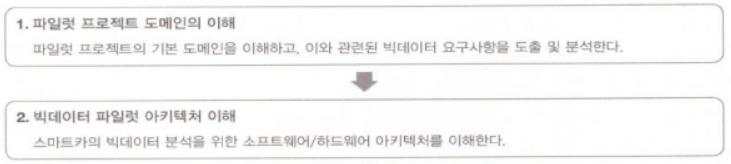

### 1. 파일럿 프로젝트 도메인의 이해
---

프로젝트를 진행할 때 가장 기본이 되는 것은 구축할 시스템에 대한 도메인과 그 도메인에 해당하는 유스케이스를 이해하는 것이다. 즉, 무엇을 하는 시스템이고, 어떤 프로세스를 통해 사용자에게 가치를 만들어내는지 이해하는 것이 성공적인 프로젝트의 초석이 된다. 본 파일럿 프로젝트에서 다루고자 하는 빅데이터 도메인은 자동차의 최첨단 전자장치와 무선통신을 결합한 스마트카 서비스다
```
새벽 5시, 스마트폰의 알람에 눈을 뜬 A씨는 스마트폰으로 오늘의 날씨를 확인한다. 영하 6도의 강추위다. 애플리케이션을 통해 차량 배터리 상태를 확인한 뒤 6시에 출발 예약을 해둔다. 출근 준비를 마치고 나면 적당한 온도로 차량이 덥혀질 것이다.
A씨가 자동차로 다가가 스마트워치를 대자 스르르 문이 열린다. A씨의 생체 정보를 스마트워치가 인식해 이를 자동차로 전송해주기 때문에 A씨 외에는 아무도 자동차를 이용할 수 없다. 운전석에 앉아 음성으로 목적지를 입력하고 난 뒤 A씨는 회사를 향해 자동차를 출발시켰다. 자동차에 장착된 인포테인먼트 기기느 A씨의 음성을 분석한 뒤 그의 기분을 파악해 자동으로 음악을 선곡해 들려준다. 양쪽에 백미러 대신 디지털카메라와 투명 디스플레이가 사각을 없애준다.
운전 중에 오전 회의에 검토할 보고서가 이메일로 도착한다. 급한 내용이다. A씨는 '자율주행'으로 전환하고 서류를 읽어본다. 자동차는 안전하게 회사 주차장에 도착한다.
```
- 소개한 칼럼은 사물인터넷과 빅데이터, 최첨단 전장 기술이 결합된 A씨의 스마트카를 이용한 출근 모습
 - 일상에서 타고 다니는 자동차 안에 컴퓨터, 무선인터넷, 전자장치가 설치되어 자동차 안에서 이메일을 주고받고, 인터넷을 통해 각종 정보도 검색
 - 무선 네트워크를 통해 차량을 원격 진단하고 운전 습관, 날씨 교통 정보 등을 분석해 운전자의 안전과 편의를 도모
- 스마트카 안에는 수백 개의 IoT 센서가 장착돼 있으며, 자동차의 상태를 모니터링하면서 수많은 차량 상태 정보를 실시간으로 만듬
 - 스마트카의 센싱 정보는 무선 네트워크를 타고 중아의 빅데이터 시스템으로 전송되며, 이 데이터는 수집 -> 적재 -> 처리 및 탐색 -> 분석 및 응용 단계를 거치면서 운자에게 편의성과 안전성을 지원하는 스마트카 서비스를 제공
- 이러한 스마트카에서 발생하는 수많은 데이터로부터 가치와 통찰력을 찾기 위한 빅데이터 시스템을 파일럿 프로젝트로 진행하고 한다.


**요구사항 파악**

- 본 파일럿 프로젝트에서는 스마트카의 빅데이터 분석을 위한 두가지 요구사항을 제시
 - **요구사항1**: 차량의 다양한 장치로부터 발생하는 로그 파일을 수집해서 기능별 상태를 점검한다.
 - **요구사항2**: 운전자의 운행 정보가 담긴 로그를 실시간으로 수집해서 주행 패턴을 분석한다.
- 두 요구사항을 분석해서 파일럿 프로젝트를 구축하기 위한 핵심 요건을 도출

요구사항1: 스마트카 상태 분석 요건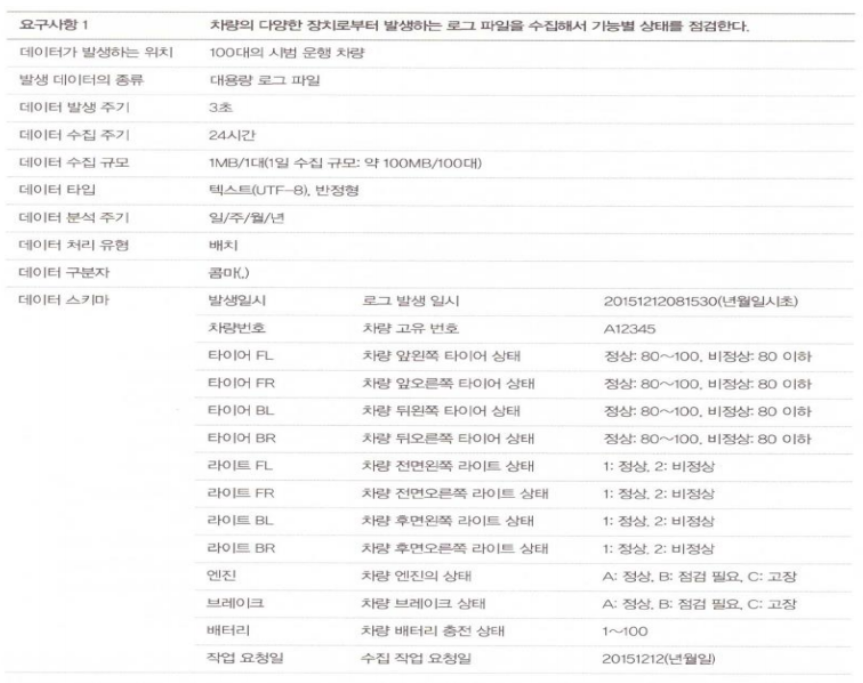

요구사항2: 스마트카 운행 분석 요건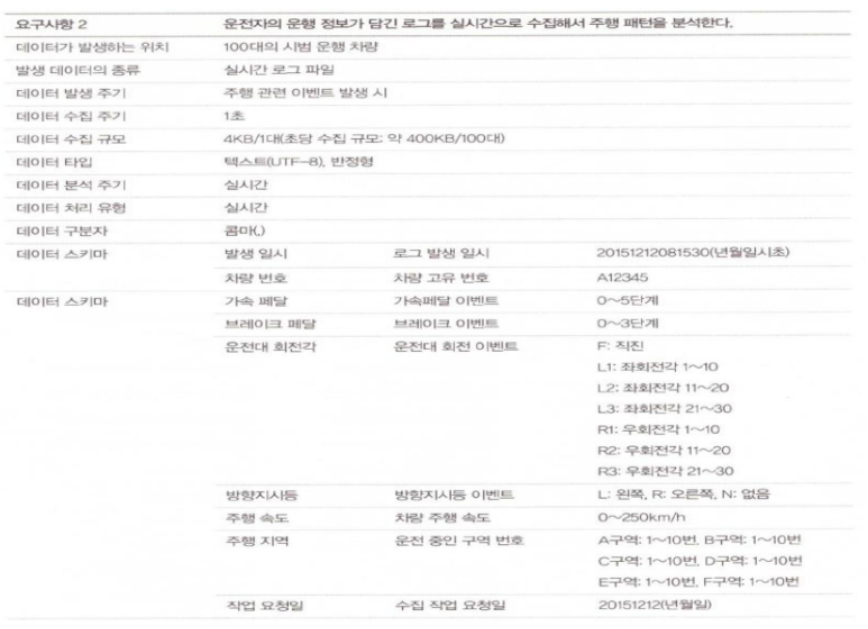

- 실제 스마트카의 빅데이터 분석 요건은 이보다 더 많고 복잡함
 - 여기서는 프로젝트의 요구사항과 분석 요건을 파일럿 프로젝트 수준인 100대의 차량으로 한정하고, 스마트카의 수집 정보도 누구나 쉽게 이해할 수 있는 수준으로 단순화

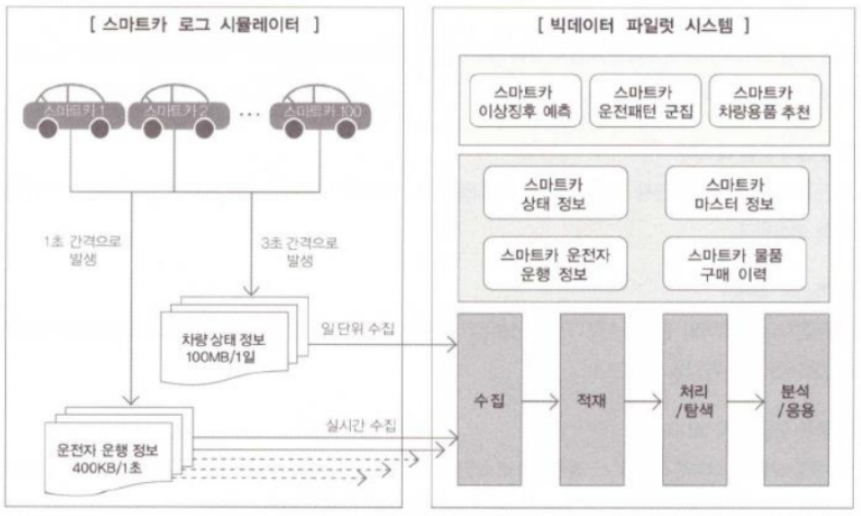

- 실제로 100대의 스마트카를 운영하면서 파일럿 프로젝트를 수행하는 것은 불가능하므로 스마트카를 시뮬레이션하는 스마트카 로그 시뮬레이터 프로그램을 사용
- 로그 시뮬레이터로 생성된 스마트카 데이터는 수집 -> 적재 -> 처리 및 탐색 -> 분석 및 응용 프로세서를 거치고, 각 단계마다 파일럿에서 활용하기 쉬운 데이터셋으로 재구성

**데이터셋 살펴보기**

- 스마트카에서 발생하는 기본 데이터셋은 총 4가지 유형을 사용

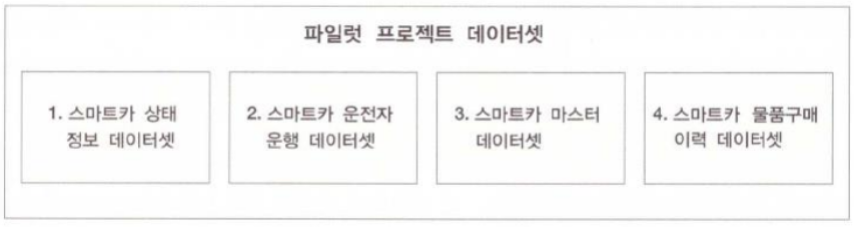

1. 스마트카 상태 정보 데이터<br>
스마트카의 각종 센서로부터 발생하는 차량의 상태 정보 데이터셋이다. 요구사항1과 직접적인 관련이 있으며, 로그시뮬레이터를 통해 생성
2. 스마트카 운전자 운행 데이터<br>
스마트카 운전자의 운전 패턴/운행 정보가 담긴 데이터셋이다. 요구사항2와 직접적인 관련이 있으며 로그 시뮬레이터를 통해 생성
3. 스마트카 마스터 데이터<br>
스마트카 운전자의 프로파일 정보가 담긴 데이터셋이다. 요구사항 1,2와 관련된 분석 데이터셋을 만들 때 활용한다. 이미 만들어진 샘플 파일을 이용
4. 스마트카 물품 구매 이력 데이터<br>
스마트카 운전자가 차량 내의 스마트 스크린을 통해 쇼핑몰에서 구입한 차량 물품 구매 목록 데이터셋이다. 요구사항 1,2와 관련된 분석 데이터셋을 만들 때 활용하는데, 이미 만들어진 샘플 파일을 이용

### 2. 빅데이터 파일럿 아키텍처 이해
---

**소프트웨어 아키텍처**

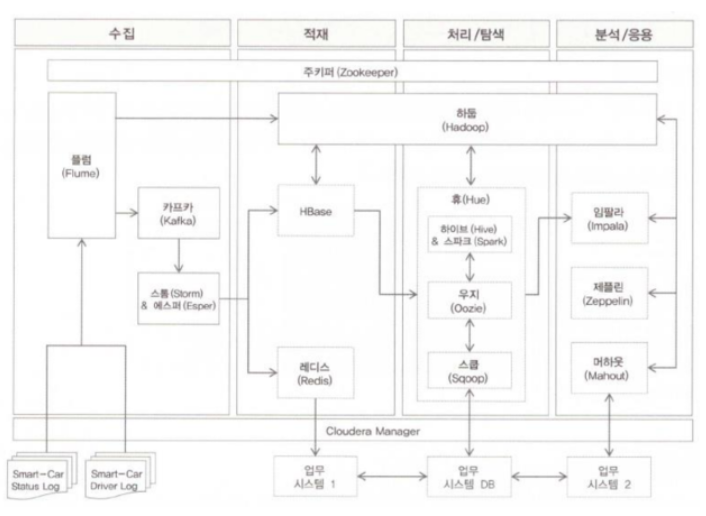

- 소프트웨어 아키텍처에 표기된 메인 오픈소스 소프트웨어는 17종이고, 분석확장 영역의 소프트워(R, 턴서플로, 플라스크)포함 20종이다.
 - 각 오픈소스 프로젝트는 크게 수집, 적재, 처리 및 탐색, 분석 및 응용 영역으로 분류
-  위 그림의 아키텍처는 이미 많은 빅데이터 시스템에 활용되고 있는 소프트웨어 아키텍처로 크개 2개의 영역으로 나뉜다. 하둡을 중심으로 앞쪽을 수집/적재(전처리) 영역, 하둡 뒤쪽을 탐색/분석(후처리) 영역으로 나눈다.

전처리와 후처리의 각 영역에 배치돼 있는 주요 소프트웨어와 요구사항 1, 2와의 관련성을 알아보자.

**수집 레이어**

- 요구사항 1, 2로부터 차량의 로그를 수집하기 위해 플럼을 사용
- 요구사항 2의 실시간 로그 이벤트를 처리하기 위해 스톰이 사용
 - 플럼과 스톰 사이의 카프카는 데이터의 안정적인 수집을 위해 버퍼링 및 트랜잭션 처리를 담당

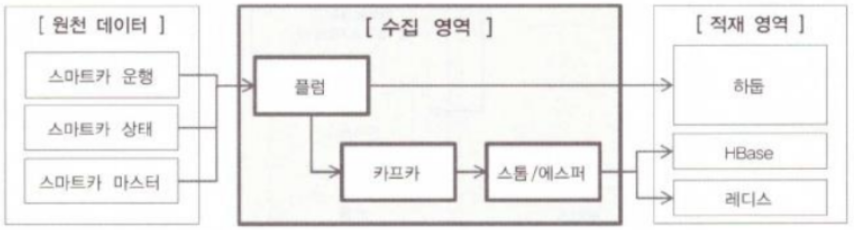

**적재 레이어**

- 적재 대상은 하둡, HBase, 레디스
- 요구사항 1의 대용량 로그 파일은 수집과 동시에 플럼 -> 하둡으로 적재
- 요구사항 2의 실시간 데이터는 플럼 -> 카프카 -> 스톰 -> HBase/레디스로 적재
 - 스톰을 통해 실시간 이벤트 분석을 수행하고, 분석된 결과에 따라 HBase와 레디스로 나누어 적재<br>
```레디스: 모든 데이터를 메모리에 저장하고 조회하기에 빠른 Read, Write 속도를 보장하는 비 관계형 데이터베이스이다.```<br>
```HBase: 분산된 Columnar DB이며, Hadoop File System(HDFS) 위에 구축, 큰 테이블에 대한 빠른 조회를 제공한다```

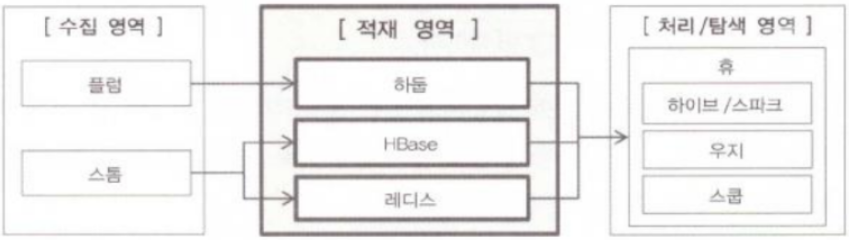

**처리/탐색 레이어**

- 하둡에 적재된 데이터는 하이브를 이용해 정제/변형/통합/분리/탐색 등의 작업을 수행
 - 데이터를 정형화된 구조로 정규화해 데이터 마트를 만듬
- 가공/분석된 데이터를 외부로 제공하기 위해 스쿱을 이용
 - 필요시 분석/응용 단계에서도 사용
- 처리/탐색 프로세스는 데이터의 품질을 높이는 단계로, 과정이 길고 복잡해지기 마련
 - 우지의 워크플로로 프로세스를 구성해 복잡도르 낮추고 자동화

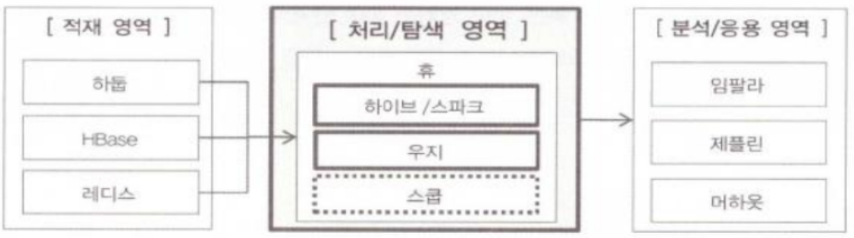

**분석/응용 레이어**

- 요구사항 1, 2에 해당하는 스마트카의 상태 점검과 운전자의 운행 패턴을 빠르게 분석하기 위해 임팔라 또는 제플린을 이용
- 머하웃과 스파크ML로 스마트카 데이터 분석을 위해 군집, 분류/예측, 추천 등을 진행
- R로 통계분석을 진행하고, 텐서플로로 딥러닝 모델을 만들어 플라스크로 서비스 API까지 제공


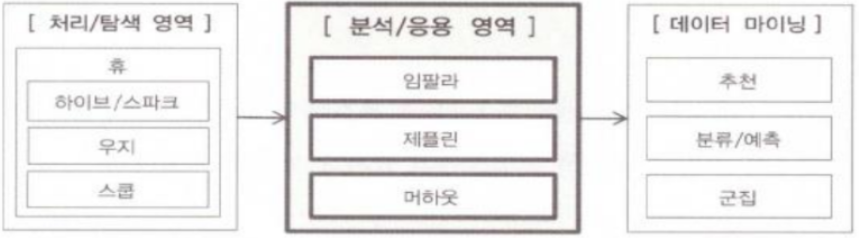

**TIP_빅데이터 기술 접근법**
---

각 레이어마다 전문 영역이 있고, 각 영역별 전문가들은 다음과 같다.

- **플랫폼 전문가**: 하둡 에코시스템 설치 및 구성
- **수집/적재 전문가**: 대규모 데이터 연동 및 통합
- **처리/탐색 전문가**: 데이터 모델 설계 및 처리
- **분석/응용 전문가**: 도메인 분석 및 인사이트 도출

위 4개의 전문가 영역의 공통적인 특징은 하둡 에코시스템에 대한 기본 아키텍처와 핵심 기술을 반드기 이해하고 있어야 한다.